In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector

In [2]:
dt = pd.read_csv("housing.csv")

In [3]:
dt

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000.0
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000.0
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000.0
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000.0
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000.0
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150.0
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000.0
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000.0


In [4]:
## checking null values first
dt.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               1
dtype: int64

In [5]:
dt.fillna(dt['price'].mean(), inplace = True)

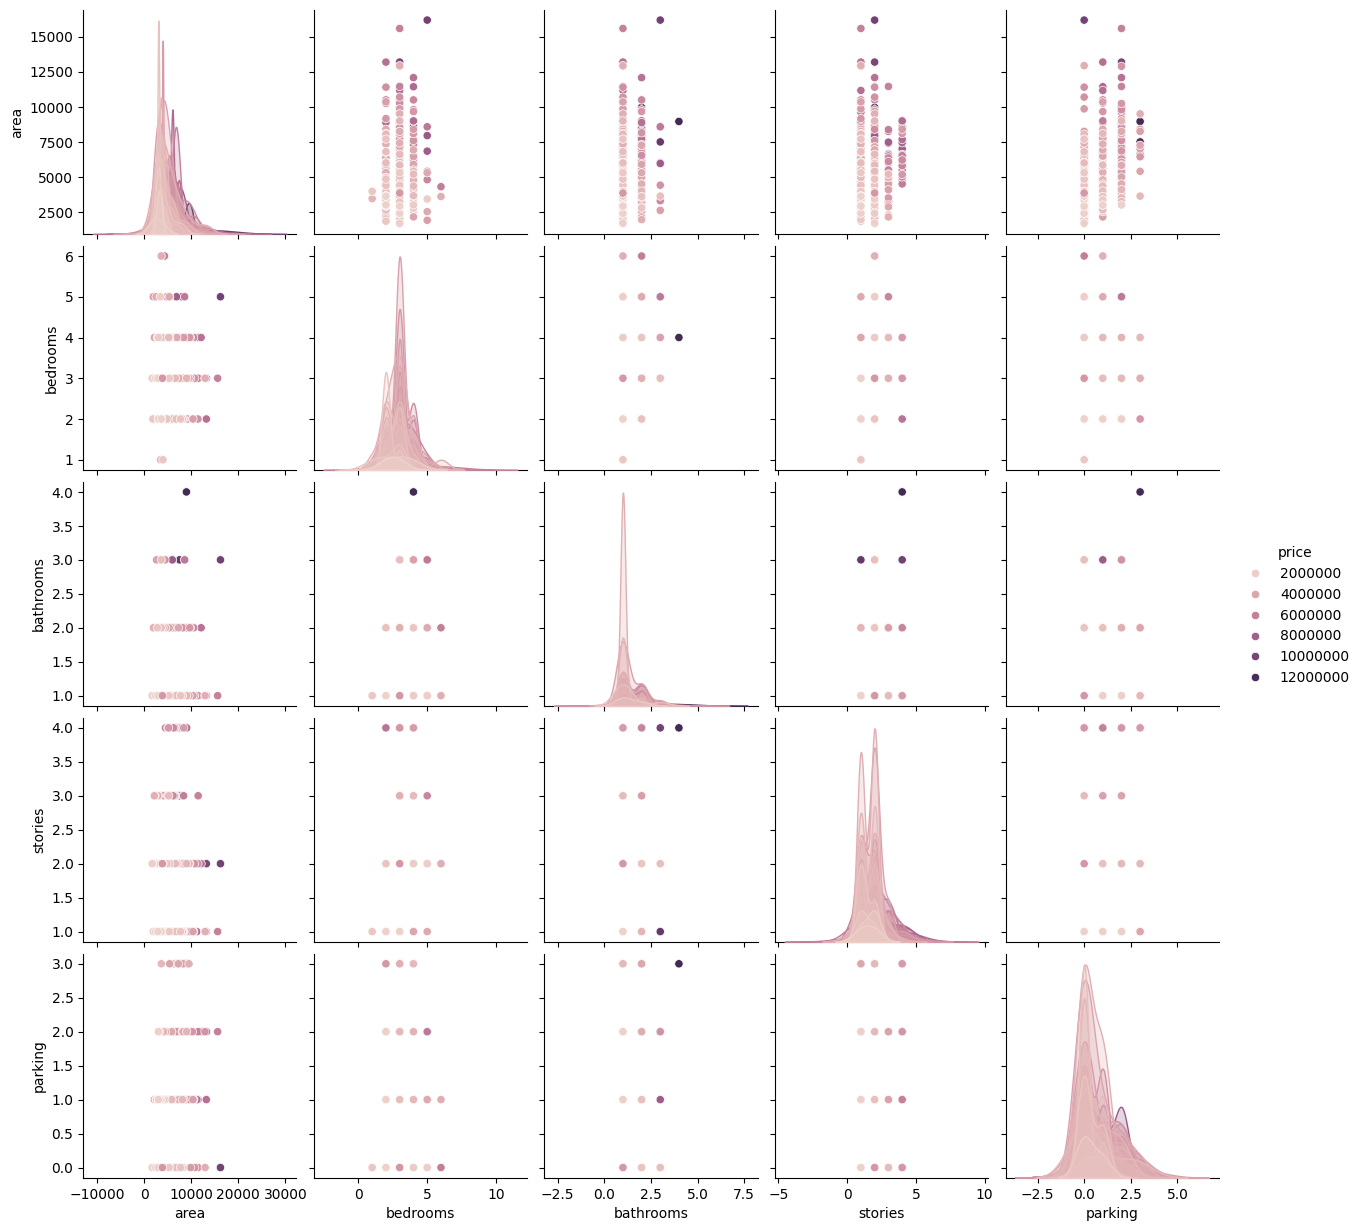

In [6]:
sns.pairplot(dt,hue = "price")

In [7]:
## checking outliers

<Figure size 700x1000 with 0 Axes>

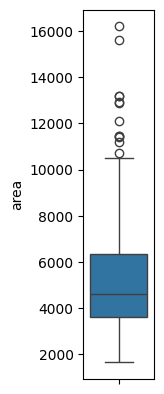

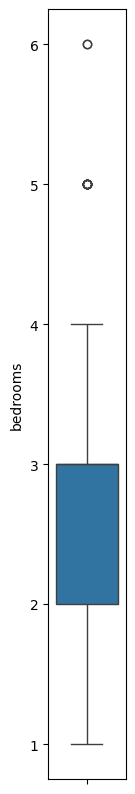

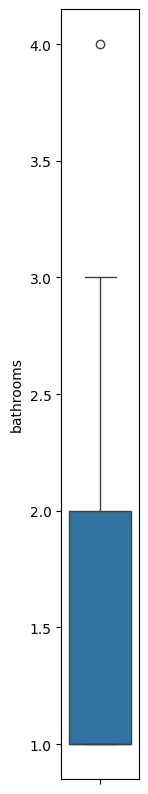

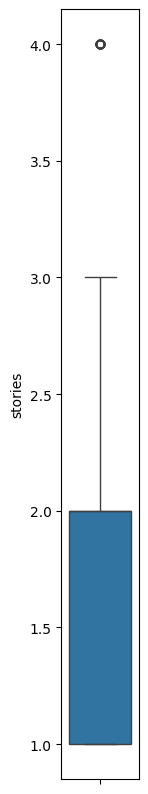

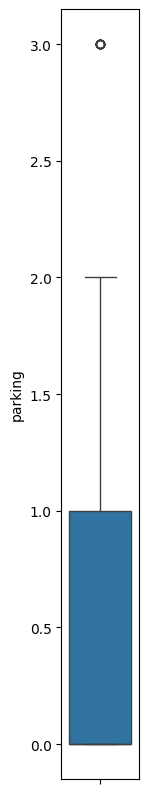

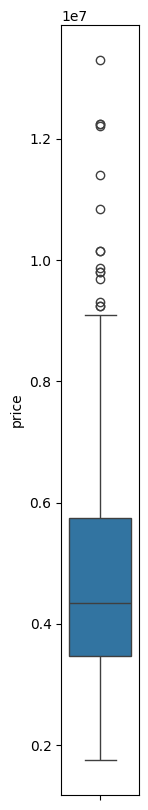

<Figure size 700x1000 with 0 Axes>

In [8]:
plt.subplot(1,6,1)
sns.boxplot(dt['area'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,2)
sns.boxplot(dt['bedrooms'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,3)
sns.boxplot(dt['bathrooms'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,4)
sns.boxplot(dt['stories'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,5)
sns.boxplot(dt['parking'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,6)
sns.boxplot(dt['price'])
plt.figure(figsize=(7,10))


In [9]:
##check which columns are containing categorical data
c =dt.select_dtypes(include = "object")
for col in c:
    uni = dt[col].unique()
    print(uni)



['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


In [10]:
## Conversion of categorical data to numerical
##encoding of 'mainroad' , 'guestroom','basement','hotwaterheating','airconditioning','prefarea' with onehotencoding and furnishingstatus with label encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [12]:
ohe = OneHotEncoder(sparse_output=False, drop='first')  # 'drop=first' avoids dummy variable trap if needed

# Select the columns for encoding
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Fit and transform the selected columns
encoded = ohe.fit_transform(dt[columns_to_encode])

# Convert the result into a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(columns_to_encode), index=dt.index)

# Drop the original columns and add the encoded columns
dt.drop(columns=columns_to_encode, inplace=True)
dt = pd.concat([dt, encoded_df], axis=1)

In [13]:
dt

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,furnished,1.330000e+07,1.0,0.0,0.0,0.0,1.0,1.0
1,8960,4,4,4,3,furnished,1.225000e+07,1.0,0.0,0.0,0.0,1.0,0.0
2,9960,3,2,2,2,semi-furnished,1.225000e+07,1.0,0.0,1.0,0.0,0.0,1.0
3,7500,4,2,2,3,furnished,1.221500e+07,1.0,0.0,1.0,0.0,1.0,1.0
4,7420,4,1,2,2,furnished,1.141000e+07,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,unfurnished,1.820000e+06,1.0,0.0,1.0,0.0,0.0,0.0
541,2400,3,1,1,0,semi-furnished,1.767150e+06,0.0,0.0,0.0,0.0,0.0,0.0
542,3620,2,1,1,0,unfurnished,1.750000e+06,1.0,0.0,0.0,0.0,0.0,0.0
543,2910,3,1,1,0,furnished,1.750000e+06,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
dt_obj2 = dt['furnishingstatus']
le = LabelEncoder()
le.fit(dt_obj2)

LabelEncoder()

In [15]:
dt['furnishingstatus'] = le.transform(dt_obj2)

In [16]:
dt

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,0,1.330000e+07,1.0,0.0,0.0,0.0,1.0,1.0
1,8960,4,4,4,3,0,1.225000e+07,1.0,0.0,0.0,0.0,1.0,0.0
2,9960,3,2,2,2,1,1.225000e+07,1.0,0.0,1.0,0.0,0.0,1.0
3,7500,4,2,2,3,0,1.221500e+07,1.0,0.0,1.0,0.0,1.0,1.0
4,7420,4,1,2,2,0,1.141000e+07,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,2,1.820000e+06,1.0,0.0,1.0,0.0,0.0,0.0
541,2400,3,1,1,0,1,1.767150e+06,0.0,0.0,0.0,0.0,0.0,0.0
542,3620,2,1,1,0,2,1.750000e+06,1.0,0.0,0.0,0.0,0.0,0.0
543,2910,3,1,1,0,0,1.750000e+06,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
## fixing outliers


In [18]:
# using IQR method for outliers in area
q1 = dt['area'].quantile(0.25)
q3 = dt['area'].quantile(0.75)
iqr= q3-q1
l = q1 - (iqr*1.5)
u = q3 + (iqr*1.5)

In [19]:
# dt =  dt[dt['area']<=u & dt['area']>l]
dt = dt[(dt['area'] > l) & (dt['area'] < u)]


In [20]:
# using IQR method for outliers in price
q11 = dt['price'].quantile(0.25)
q33 = dt['price'].quantile(0.75)
iqrr= q33-q11
lb = q11 - (iqrr*1.5)
ub = q33 + (iqrr*1.5)

In [21]:
dt = dt[(dt['price'] > lb) & (dt['price'] < ub)]

In [22]:
dt

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
18,4600,3,2,2,2,0,8.890000e+06,1.0,1.0,0.0,0.0,1.0,0.0
19,6420,3,2,2,1,1,8.855000e+06,1.0,0.0,0.0,0.0,1.0,1.0
20,4320,3,1,2,2,1,8.750000e+06,1.0,0.0,1.0,1.0,0.0,0.0
21,7155,3,2,1,2,2,8.680000e+06,1.0,1.0,1.0,0.0,1.0,0.0
22,8050,3,1,1,1,0,8.645000e+06,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,2,1.820000e+06,1.0,0.0,1.0,0.0,0.0,0.0
541,2400,3,1,1,0,1,1.767150e+06,0.0,0.0,0.0,0.0,0.0,0.0
542,3620,2,1,1,0,2,1.750000e+06,1.0,0.0,0.0,0.0,0.0,0.0
543,2910,3,1,1,0,0,1.750000e+06,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_11460\1619261856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt)


<Axes: ylabel='Density'>

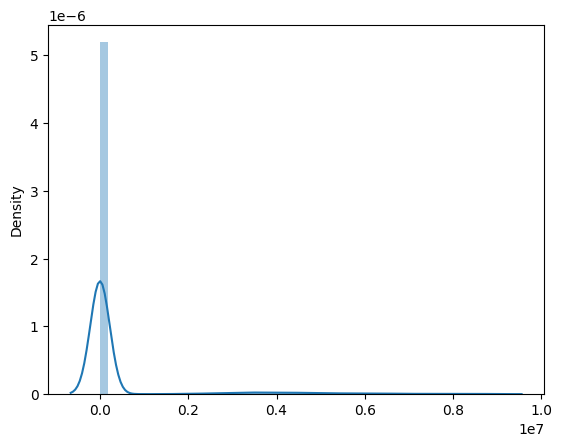

In [23]:
sns.distplot(dt)

<Figure size 700x1000 with 0 Axes>

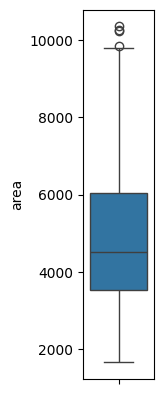

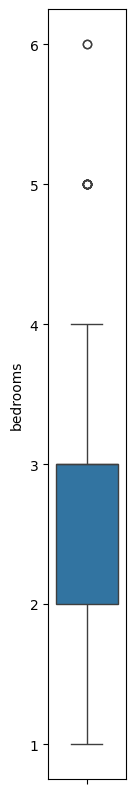

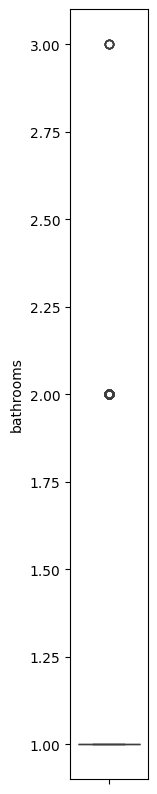

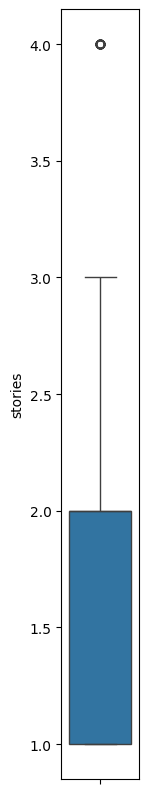

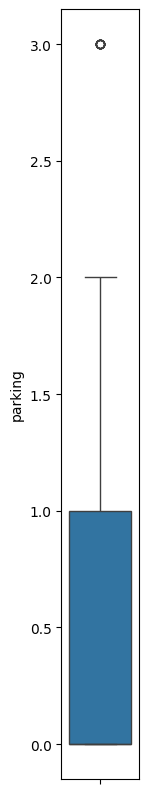

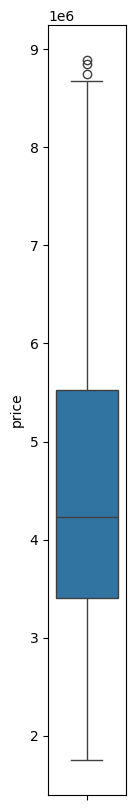

<Figure size 700x1000 with 0 Axes>

In [24]:
plt.subplot(1,6,1)
sns.boxplot(dt['area'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,2)
sns.boxplot(dt['bedrooms'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,3)
sns.boxplot(dt['bathrooms'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,4)
sns.boxplot(dt['stories'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,5)
sns.boxplot(dt['parking'])
plt.figure(figsize=(7,10))
plt.subplot(1,6,6)
sns.boxplot(dt['price'])
plt.figure(figsize=(7,10))

In [25]:
##comparitively minimized the outliers

feature selection

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
sfs = SequentialFeatureSelector(lr,k_features=8,forward=False)

In [29]:
x = dt[["area"	,"bedrooms"	,"bathrooms"	,"stories",	"parking"	,"furnishingstatus",	"mainroad_yes"	,"guestroom_yes"	,"basement_yes",	"hotwaterheating_yes"	,"airconditioning_yes"	,"prefarea_yes"]]

In [30]:
y = dt['price']

In [31]:
sfs.fit(x,y)


SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(8, 8), scoring='r2')

In [32]:
sfs.k_score_

np.float64(-8.189092212191593)

In [33]:
selected_features = list(sfs.k_feature_names_)
x_new = dt[selected_features]
x_new

,area,bathrooms,stories,furnishingstatus,mainroad_yes,guestroom_yes,airconditioning_yes,prefarea_yes
18,4600,2,2,0,1.0,1.0,1.0,0.0
19,6420,2,2,1,1.0,0.0,1.0,1.0
20,4320,1,2,1,1.0,0.0,0.0,0.0
21,7155,2,1,2,1.0,1.0,1.0,0.0
22,8050,1,1,0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1.0,0.0,0.0,0.0
541,2400,1,1,1,0.0,0.0,0.0,0.0
542,3620,1,1,2,1.0,0.0,0.0,0.0
543,2910,1,1,0,0.0,0.0,0.0,0.0


In [34]:
## feature scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
ss = MinMaxScaler()
ss.fit(x_new)

MinMaxScaler()

In [37]:
dt = pd.DataFrame(ss.transform(x_new))

In [38]:
dt

,0,1,2,3,4,5,6,7
0,0.338691,0.5,0.333333,0.0,1.0,1.0,1.0,0.0
1,0.547646,0.5,0.333333,0.5,1.0,0.0,1.0,1.0
2,0.306544,0.0,0.333333,0.5,1.0,0.0,0.0,0.0
3,0.632032,0.5,0.000000,1.0,1.0,1.0,1.0,0.0
4,0.734788,0.0,0.000000,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
509,0.154994,0.0,0.000000,1.0,1.0,0.0,0.0,0.0
510,0.086108,0.0,0.000000,0.5,0.0,0.0,0.0,0.0
511,0.226177,0.0,0.000000,1.0,1.0,0.0,0.0,0.0
512,0.144661,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
pf = PolynomialFeatures(degree = 3)

In [41]:
pf.fit(x_new)

PolynomialFeatures(degree=3)

In [42]:
dt = pf.transform(x_new)

In [43]:
##splitting dataset into training and testing
from sklearn.model_selection import train_test_split

In [44]:
x_train , x_test , y_train , y_test = train_test_split(x_new , y , test_size=(0.2), random_state = 50)

In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
lr.score(x_test,y_test)*100

68.8013329641071

In [47]:
lr.predict([[4600,2,2,0,1.0,1.0,1.0,0.0]])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6348642.48365034])

In [48]:
y_pred = lr.predict(x_new)

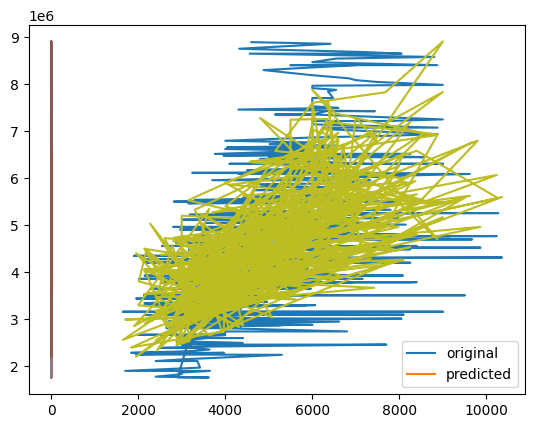

In [49]:
plt.plot(x_new , y)
plt.plot(x_new , y_pred)
plt.legend(["original","predicted"])